# Introduction à sklearn - premier modèle et visualisations

## 1. Importation des modules et des données

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0


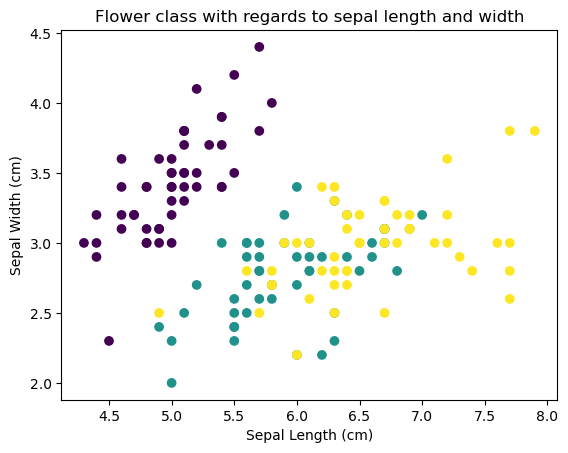

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

# On récupère notre donnée. As_frame nous permet d'avoir un dataframe, un objet venant
# de la librairie pandas.

data = load_iris(as_frame=True)["frame"]

# On dessine la classe de fleurs en fonction des 2 premières features
plt.scatter(data.iloc[:,0], data.iloc[:, 1], c=data.iloc[:, -1])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title("Flower class with regards to sepal length and width")

data.head(1)

## 2. Importation de notre modèle et entraînement

On veut prédire des variables discrètes, donc c'est un problème de classification. On choisit le modèle K-Neighbours.

La magie, c'est que la syntaxe pour instancier, entrainer, évaluer et prédire son modèle sont toujours identiques : 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# X sont les variables (toutes les colonnes de data sauf la dernière) qui nous permettent
# de prédire Y (dernière colonne)

X, Y = data.iloc[:, :-1], data.iloc[:, -1]

# On instancie notre modèle
model = KNeighborsClassifier()
# On l'entraîne sur nos données
model.fit(X, Y)
# On évalue sa performance
model.score(X, Y)

0.9666666666666667

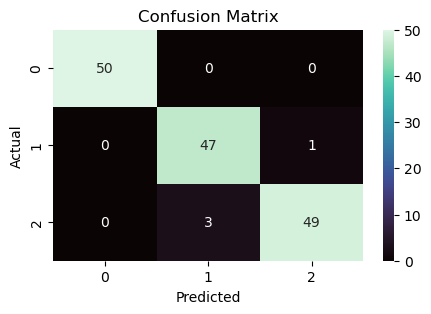

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# On créé une matrice avec la prédiction vs la réalité en utilisant la fonction
# .predict() de notre modèle
cm = confusion_matrix(model.predict(X), Y)

# On visualise
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, cmap="mako")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

On peut également prédire un seul exemple, par exemple ligne 47

In [41]:
random_row = data.iloc[47, :-1].to_numpy().reshape(1, -1)

prediction = model.predict(random_row)

print(f"Random row : {random_row}")
print(f"Real class: {data.iloc[47,-1]}")
print(f"Our prediction: {prediction}")

Random row : [[4.6 3.2 1.4 0.2]]
Real class: 0
Our prediction: [0]


## 3. Le gros défaut de notre modèle

Le problème, c'est que pour le moment on entraîne notre modèle sur X, Y (avec model.fit())  
et on l'évalue (avec model.score())... sur les mêmes données ! Ce qui peut facilement  
mener à des problèmes dits d'over-fitting, c'est-à-dire une suradaptation aux données  
d'entraînement, à tel point que notre modèle ne parvient pas à généraliser sur des  
données qu'il n'a pas déjà vu, or c'est tout le but.  

Pour résoudre le problème, on divise notre dataset en deux grâce à une fonction de sk-learn nommée  
train_test_split. On se retrouve avec, aléatoirement, des lignes (samples) dans notre dataset  
d'entraînement, et d'autres dans notre dataset de test.

In [42]:
from sklearn.model_selection import train_test_split

# On passe à la fonction nos données input et output, comme avant
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1])

# On réentraîne notre modèle sur ces nouvelles données
model.fit(X_train, Y_train)

# et on le teste sur des données qu'il n'a jamais vu
model.score(X_test, Y_test)

0.9473684210526315

Ce nouveau score nous permet d'évaluer la performance réelle du modèle, et il changera à  
chaque fois qu'on relance l'entraînement puisque la sélection de samples par train_test_split est aléatoire.

## 4. La suite

Dans le prochain post, on implémentera notre propre version d'un algorithme de  
régression linéaire pour véritablemennt en comprendre le fonctionnement

L'idée était seulement de donner quelques bases avant de recoder nos premiers algorithmes,  
car il nous faudra un moyen de les vérifier. Pour mieux utiliser sk_learn, voici d'autres fonctions que l'on apprendra plus tard:

1. Scaler (preprocessing)
2. inverse_transform
3. cross_val_score
4. gridsearchcv
5. pipeline
6. imputer
7. encoder...